# 우편번호 인식기
- 사용자가 마우스로 우편번호 숫자를 작성하면, 신경망 모델이 이를 인식하여 숫자를 예측

## 라이브러리 불러오기

In [1]:
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
# import winsound

# 저장한 모델 불러오기

- `7-5.ipynb` 실습을 통해 저장한 모델 불러오기
- MNIST 데이터셋으로 학습된 손글씨 숫자 인식 모델

In [2]:
model = tf.keras.models.load_model('dmlp_trained.h5')

## 초기화 함수 정의
- 우편번호 작성 화면 초기화
- 5개의 숫자를 작성할 수 있는 영역 생성, 안내 텍스트 표시

In [3]:
def reset():
    global img
    img = np.ones((200, 520, 3), dtype=np.uint8) * 255
    for i in range(5):
        cv.rectangle(img, (10 + i * 100, 50), (10 + (i + 1) * 100, 150), (0, 0, 255))
    cv.putText(img, 'e:erase s:show r:recognition q:quit', (10, 40), cv.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 1)

## 숫자 추출 함수 정의
- 작성된 숫자를 추출하여 모델이 처리할 수 있는 형태로 변환
- 각 숫자는 28x28 크기로 리사이즈, 흑백으로 변환

In [4]:
def grab_numerals():
    numerals = []
    for i in range(5):
        roi = img[51:149, 11 + i * 100:9 + (i + 1) * 100, 0]
        roi = 255 - cv.resize(roi, (28, 28), interpolation=cv.INTER_CUBIC)
        numerals.append(roi)
    numerals = np.array(numerals)
    return numerals

## 숫자 시각화 함수 정의

- 추출된 숫자를 화면에 표시
- 사용자가 작성한 숫자 확인 가능

In [5]:
def show():
    numerals = grab_numerals()
    plt.figure(figsize=(25, 5))
    for i in range(5):
        plt.subplot(1, 5, i + 1)
        plt.imshow(numerals[i], cmap='gray')
        plt.xticks([]); plt.yticks([])
    plt.show()

## 숫자 인식 함수 정의
- 추출된 숫자를 모델에 입력하여 예측
- 예측된 숫자는 화면에 표시되고 소리를 재생함

In [6]:
def recognition():
    numerals = grab_numerals()
    numerals = numerals.reshape(5, 784)
    numerals = numerals.astype(np.float32) / 255.0
    res = model.predict(numerals)  # 신경망 모델로 예측
    class_id = np.argmax(res, axis=1)
    for i in range(5):
        cv.putText(img, str(class_id[i]), (50 + i * 100, 180), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 1)
    # winsound.Beep(1000, 500)

## 마우스 이벤트 처리

- 왼쪽 버튼을 클릭하거나 드래그하면 숫자를 작성할 수 있음

In [7]:
BrushSiz = 4
LColor = (0, 0, 0)

def writing(event, x, y, flags, param):
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(img, (x, y), BrushSiz, LColor, -1)
    elif event == cv.EVENT_MOUSEMOVE and flags == cv.EVENT_FLAG_LBUTTON:
        cv.circle(img, (x, y), BrushSiz, LColor, -1)

## 메인 루프

- 사용자는 'e', 's', 'r', 'q' 키를 사용하여 초기화, 시각화, 인식, 종료를 수행함

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


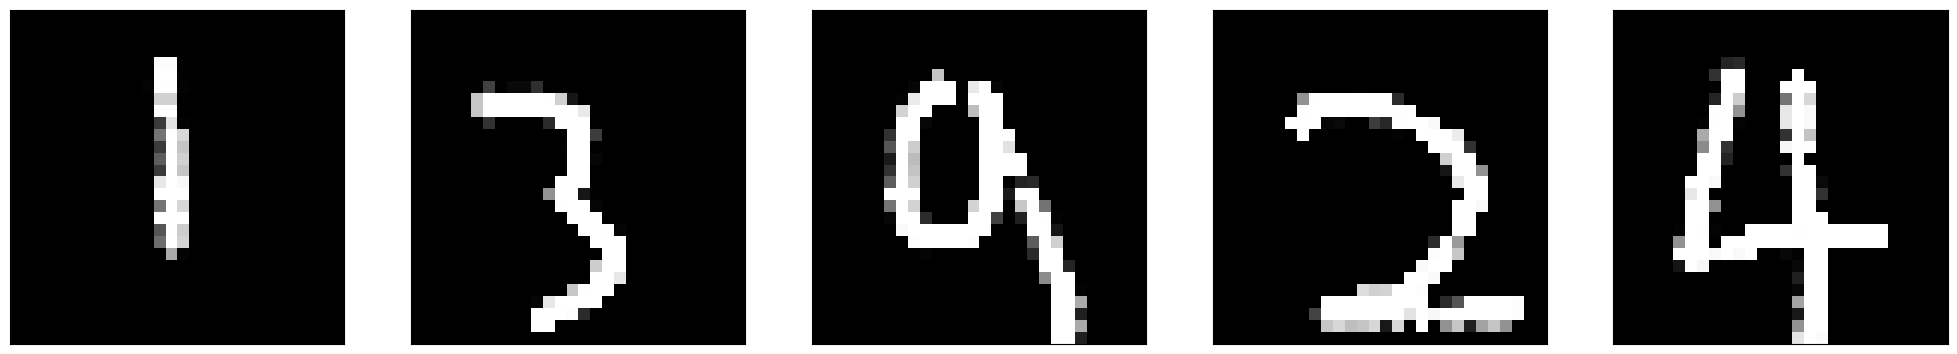

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [9]:
reset()
cv.namedWindow('Writing')
cv.setMouseCallback('Writing', writing)

while True:
    cv.imshow('Writing', img)
    key = cv.waitKey(1)
    if key == ord('e'):
        reset()
    elif key == ord('s'):
        show()
    elif key == ord('r'):
        recognition()
    elif key == ord('q'):
        break

cv.destroyAllWindows()